In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dw=pd.read_csv("economic_in.csv")
dw.head(4)


,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293


In [3]:
dw.isnull().sum()

Unnamed: 0           0
year                 0
month                0
interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [4]:
dw.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [5]:
dw.tail(6)


,interest_rate,unemployment_rate,index_price
18,1.75,6.1,884
19,1.75,6.1,866
20,1.75,5.9,876
21,1.75,6.2,822
22,1.75,6.2,704
23,1.75,6.1,719


In [6]:
dw.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


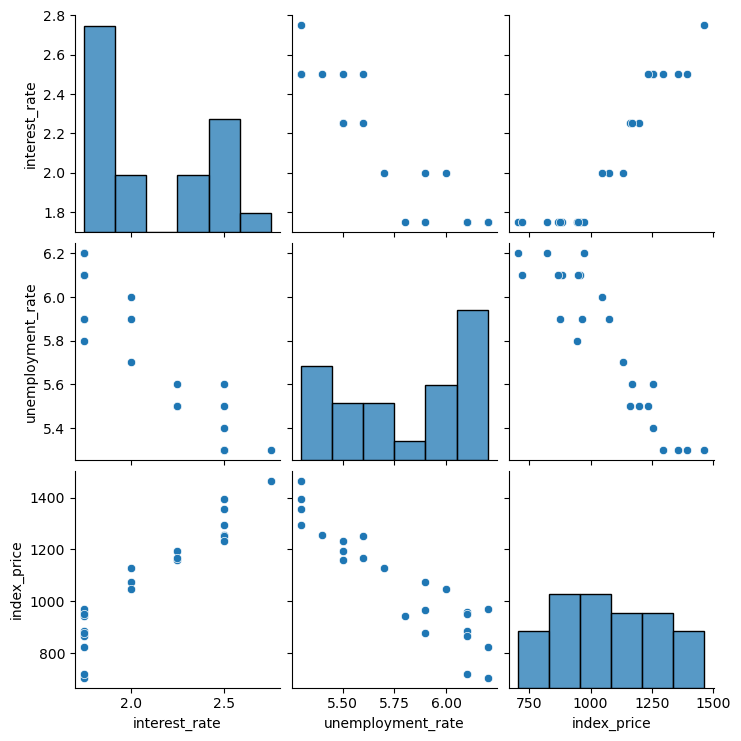

In [9]:
import seaborn as sw
sw.pairplot(dw)
plt.show()

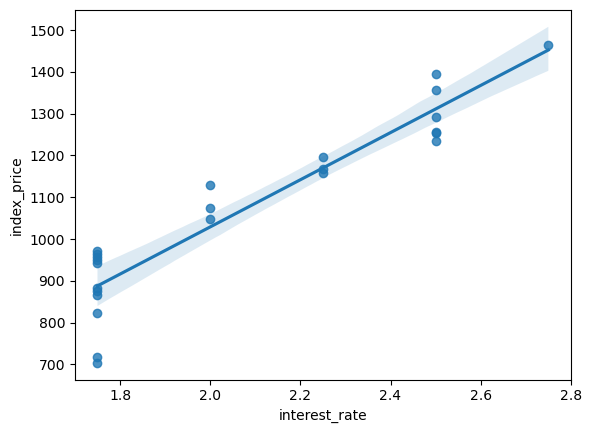

In [14]:
sw.regplot(x=dw["interest_rate"],y=dw["index_price"])
plt.show()

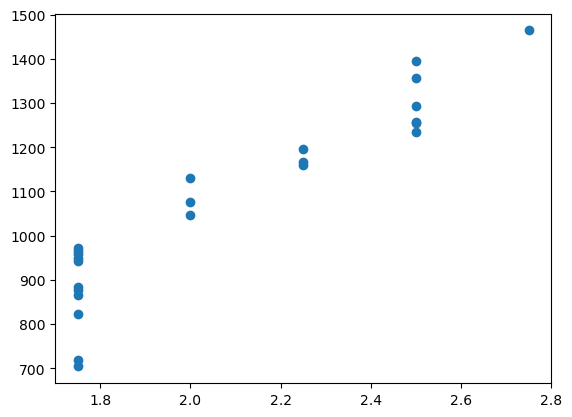

In [16]:
plt.scatter(dw['interest_rate'],dw['index_price'])
plt.show()

In [26]:
x=dw.iloc[:,:-1]
y=dw.iloc[:,-1]
y.head(4)

0    1464
1    1394
2    1357
3    1293
Name: index_price, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [44]:
from sklearn.preprocessing import StandardScaler
scalu=StandardScaler() 
x_train=scalu.fit_transform(x_train)
x_test=scalu.transform(x_test)  

x_test

array([[ 0.57346234, -0.8615569 ],
       [-0.90115511,  1.30956648],
       [ 2.0480798 , -1.48187786],
       [-0.90115511,  0.999406  ],
       [-0.16384638,  0.37908503],
       [ 0.57346234, -0.55139641]])

In [45]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [46]:
y_pred=lr.predict(x_test)
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [58]:
from sklearn.model_selection import cross_val_score
valid=cross_val_score(lr,x_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [59]:
np.mean(valid)

np.float64(-5914.828180162388)

In [60]:
y_pred=lr.predict(x_test)
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [61]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MSE:",mse)
print("MAE:",mae)     
print("R2_Score:",r2)
rmse=np.sqrt(mse)
print("RMSE:",rmse)

MSE: 5793.762887712579
MAE: 59.935781523235526
R2_Score: 0.8278978091457142
RMSE: 76.11677139574812


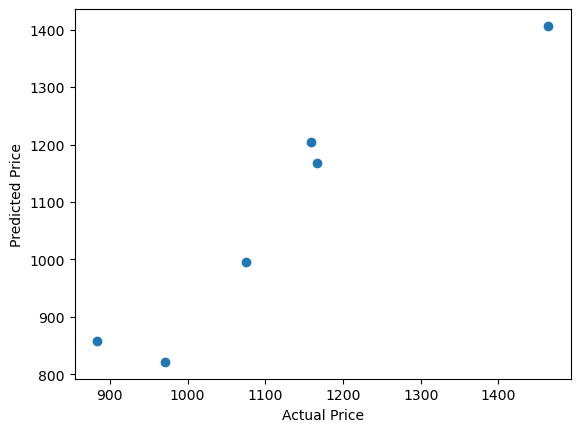

In [62]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()  


In [63]:
resi=y_test-y_pred
print(resi)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


C:\Users\Supratik\AppData\Local\Temp\ipykernel_30228\3915337575.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resi)


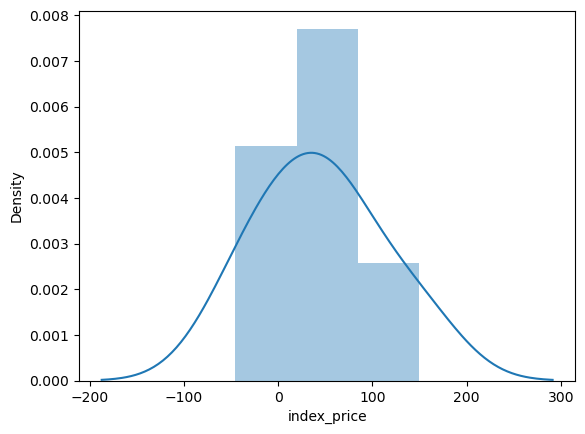

In [67]:
import seaborn as sns
sns.distplot(resi)
plt.show()

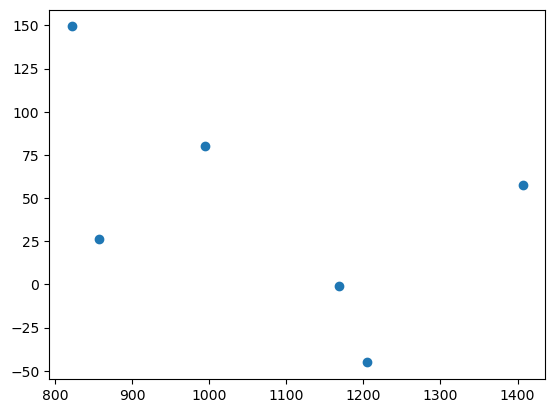

In [68]:
plt.scatter(y_pred,resi)
plt.show()